<a href="https://colab.research.google.com/github/sugardarksugar/tecky-exercises/blob/master/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/fchollet/stable-diffusion-tensorflow --upgrade --quiet
!pip install tensorflow tensorflow_addons ftfy --upgrade --quiet
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2
!pip install pyngrok==4.1.1
!pip install flask_ngrok
!ngrok authtoken 2IqFInd9q5429Zw6UXXBa8bhycc_fn7jYCRQN4FCLca27ddt  

     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 1.1 MB 67.1 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 1.7 MB 68.5 MB/s 
     |████████████████████████████████| 439 kB 46.3 MB/s 
     |████████████████████████████████| 6.0 MB 60.0 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be DOWNGRADED:
  libcudnn8
0 upgraded, 0 newly installed, 1 downgraded, 1 to remove and 18 not upgraded.
Need to get 430 MB of archives.
After this operation, 1,392 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcud

1356917/1356917 [==============================] - 0s 0us/step
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://a0a7-35-185-81-178.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
loading model


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


198152112/198152112 [==============================] - 3s 0us/step
loaded model
content: {'id': 1, 'companyName': 'cat', 'companyDescription': 'cute big flying'}
userInput: company logo cat and company description cute big flying


  0   1: 100%|██████████| 53/53 [01:16<00:00,  1.44s/it]


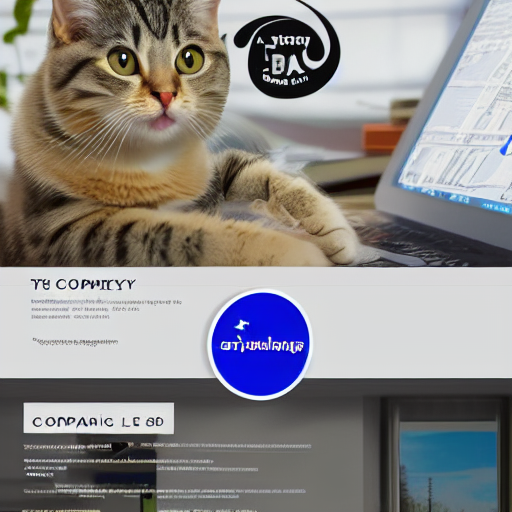

INFO:werkzeug:127.0.0.1 - - [22/Dec/2022 02:24:19] "POST /recieve HTTP/1.1" 200 -


loading model
loaded model
content: {'id': 2, 'companyName': 'cat', 'companyDescription': 'cute cute'}
userInput: company logo cat and company description cute cute


  0   1: 100%|██████████| 53/53 [01:08<00:00,  1.29s/it]


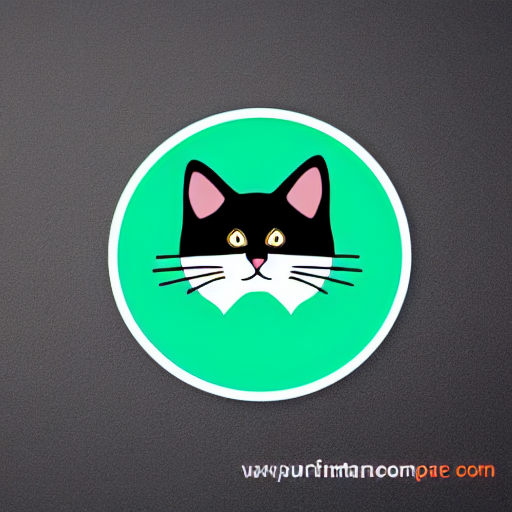

INFO:werkzeug:127.0.0.1 - - [22/Dec/2022 02:27:40] "POST /recieve HTTP/1.1" 200 -


loading model
loaded model
content: {'id': 1, 'companyName': 'cat', 'companyDescription': 'cute'}
userInput: company logo cat and company description cute


 52 989:   0%|          | 0/53 [00:19<?, ?it/s]
ERROR:__main__:Exception on /recieve [POST]
Traceback (most recent call last):
  File "<ipython-input-2-526c2d3addd1>", line 36, in userinput
    img = generator.generate(
  File "/usr/local/lib/python3.8/dist-packages/stable_diffusion_tf/stable_diffusion.py", line 71, in generate
    e_t = self.get_model_output(
  File "/usr/local/lib/python3.8/dist-packages/stable_diffusion_tf/stable_diffusion.py", line 110, in get_model_output
    unconditional_latent = self.diffusion_model.predict_on_batch(
  File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 2571, in predict_on_batch
    outputs = self.predict_function(iterator)
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/traceback_utils.py", line 153, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/execute.py", line 52, in quick_execute
    tensors = pywrap_tf

Graph execution error:

Detected at node 'model_1/u_net_model/spatial_transformer/basic_transformer_block/cross_attention/Softmax' defined at (most recent call last):
    File "/usr/lib/python3.8/threading.py", line 890, in _bootstrap
      self._bootstrap_inner()
    File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
      self.run()
    File "/usr/lib/python3.8/threading.py", line 870, in run
      self._target(*self._args, **self._kwargs)
    File "/usr/lib/python3.8/socketserver.py", line 683, in process_request_thread
      self.finish_request(request, client_address)
    File "/usr/lib/python3.8/socketserver.py", line 360, in finish_request
      self.RequestHandlerClass(request, client_address, self)
    File "/usr/lib/python3.8/socketserver.py", line 747, in __init__
      self.handle()
    File "/usr/local/lib/python3.8/dist-packages/werkzeug/serving.py", line 345, in handle
      BaseHTTPRequestHandler.handle(self)
    File "/usr/lib/python3.8/http/server.p

In [ ]:
from stable_diffusion_tf.stable_diffusion import Text2Image
from PIL import Image
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template , request , jsonify , send_file

app = Flask(__name__)
run_with_ngrok(app)

def load_model():
  print("loading model")
  generator = Text2Image( 
      img_height=512,
      img_width=512,
      jit_compile=False,  # You can try True as well (different performance profile)
  )
  print("loaded model")
  return generator

# load_model()

@app.route('/recieve',methods = ['POST'])
def userinput():
    try:

      generator = load_model()

      content = request.json

      print("content:", content)

      userInput = "company logo " + str(content['companyName']) + " and company description " + str(content['companyDescription'])
      filename = str(content['id']) + '.jpg'

      print("userInput:", userInput)
      
      img = generator.generate(
          userInput,
          num_steps=51,
          unconditional_guidance_scale=7.5,
          temperature=1,
          batch_size=1,
      )

      pil_img = Image.fromarray(img[0])
      display(pil_img)
      pil_img.save(filename)
      return send_file(
        filename,
        mimetype='image/jpeg'
      )

    except Exception as e: 
      print(e)  
      return jsonify({"error":e})

app.run()

1356917/1356917 [==============================] - 0s 0us/step
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://86fc-35-199-15-2.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


198152112/198152112 [==============================] - 2s 0us/step
{'id': 1, 'companyName': 'Bear', 'companyDescription': 'bloody, red , horrible , scary, violent, unsettling'}
company logo Bear and company description bloody, red , horrible , scary, violent, unsettling


  0   1: 100%|██████████| 1/1 [00:19<00:00, 19.01s/it]


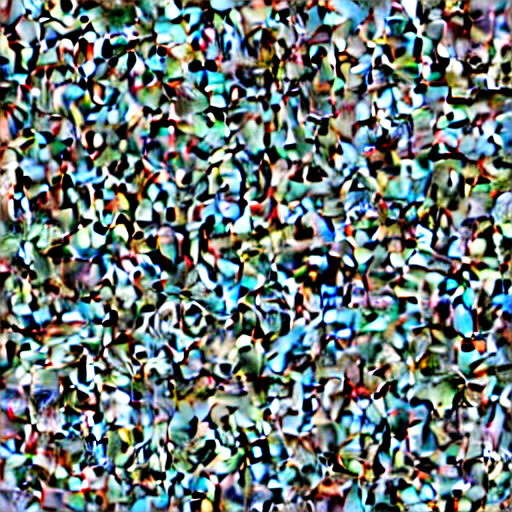

INFO:werkzeug:127.0.0.1 - - [20/Dec/2022 07:58:11] "POST /recieve HTTP/1.1" 200 -


{'id': 2, 'companyName': 'Bear', 'companyDescription': 'bloody, red , horrible , scary, violent, unsettling'}
company logo Bear and company description bloody, red , horrible , scary, violent, unsettling


  0   1: 100%|██████████| 1/1 [00:09<00:00,  9.88s/it]


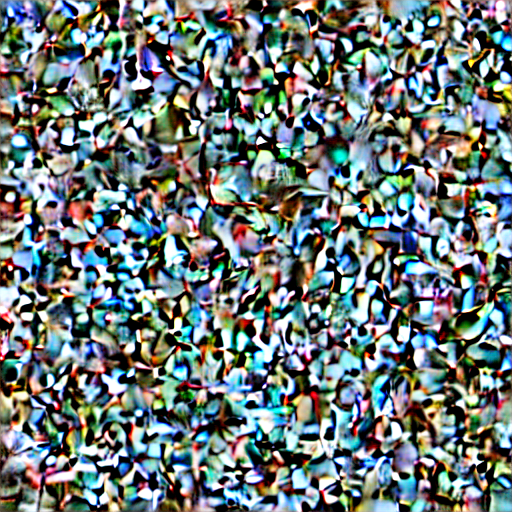

INFO:werkzeug:127.0.0.1 - - [20/Dec/2022 07:59:32] "POST /recieve HTTP/1.1" 200 -


In [ ]:
from stable_diffusion_tf.stable_diffusion import Text2Image
from PIL import Image
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template , request , jsonify , send_file

app = Flask(__name__)
run_with_ngrok(app)

@app.route('/recieve',methods = ['POST'])
def userinput():
    try:

      generator = Text2Image( 
      img_height=512,
      img_width=512,
      jit_compile=False,  # You can try True as well (different performance profile)
      )

      content = request.json

      print(content)

      userInput = "company logo " + str(content['companyName']) + " and company description " + str(content['companyDescription'])
      filename = content['id'] + '.jpg'

      print(userInput)
      
      img = generator.generate(
          userInput,
          num_steps=1,
          unconditional_guidance_scale=7.5,
          temperature=1,
          batch_size=1,
      )

      pil_img = Image.fromarray(img[0])
      display(pil_img)
      pil_img.save(filename)
      return send_file(
        filename,
        mimetype='image/jpeg'
      )

    except Exception as e: 
      print(e)  
      return jsonify({"error":e})

app.run()